In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [181]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [182]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [163]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [164]:
data_fake.shape, data_true.shape

((23481, 4), (21417, 4))

In [165]:
data_fake["class"] = 0
data_true['class'] = 1

In [166]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [167]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis = 0, inplace = True)
    
data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)    

In [168]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [169]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [170]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [171]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.shape

(44878, 5)

In [172]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

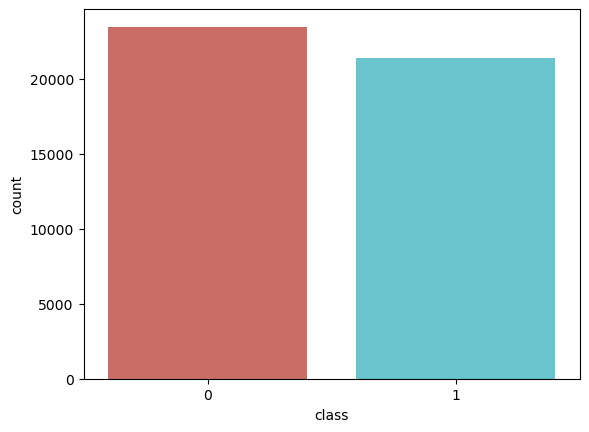

In [173]:
sns.countplot(x='class', data=data_merge, palette='hls')

In [174]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [175]:
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [176]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [177]:
data = data.sample(frac = 1)

In [178]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [135]:
data.columns

Index(['text', 'class'], dtype='object')

In [179]:
data.head(10)

,text,class
0,During a live CNN interview with Rudy Giuliani...,0
1,"On January 20 this year, more than 230 people ...",0
2,DUBAI (Reuters) - Saudi King Salman told U.S. ...,1
3,This is why elections have consequences. Durin...,0
4,WASHINGTON (Reuters) - The White House said on...,1
5,"Donald Trump is a sad, sad little man who need...",0
6,"A first glance, this doesn t seem like a big d...",0
7,GAZA (Reuters) - Influential exiled Palestinia...,1
8,(This November 28 story corrects to add attri...,1
9,NEW YORK (Reuters) - A group of 11 Republican ...,1


In [71]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [72]:
data['text'] = data['text'].apply(wordopt)

In [73]:
data['text']

0        washington  reuters    republicans plan to rel...
1        washington  reuters    u s  supreme court just...
2        washington  reuters    the united states on th...
3        if you ve been hiding under your bed since don...
4                                                         
                               ...                        
44873    washington  reuters    republican u s  preside...
44874    new york  reuters    defying opinion polls and...
44875    after being found competent to stand trial fol...
44876     there s no way to sample this extra  or   of ...
44877    who is paul manafort  well  for starters  he s...
Name: text, Length: 44878, dtype: object

In [74]:
x = data['text']
y = data['class']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test =  vectorization.transform(x_test)

# Train models

In [77]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [78]:
pred_lr = LR.predict(xv_test)

In [79]:
print("test accuracy :",accuracy_score(pred_lr,y_test))

test accuracy : 0.9850267379679144


In [80]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5871
           1       0.98      0.99      0.98      5349

    accuracy                           0.99     11220
   macro avg       0.98      0.99      0.98     11220
weighted avg       0.99      0.99      0.99     11220



In [81]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [82]:
pred_dt = DT.predict(xv_test)

In [83]:
print("test accuracy :",accuracy_score(pred_dt,y_test))

test accuracy : 0.9952762923351158


In [84]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5871
           1       1.00      0.99      1.00      5349

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [85]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [86]:
pred_gb = GB.predict(xv_test)

In [87]:
print("test accuracy :",accuracy_score(pred_gb,y_test))

test accuracy : 0.9957219251336898


In [88]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5871
           1       0.99      1.00      1.00      5349

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [89]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [90]:
pred_rf = RF.predict(xv_test)

In [91]:
print("test accuracy :",accuracy_score(pred_rf,y_test))

test accuracy : 0.9893939393939394


In [92]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5871
           1       0.99      1.00      1.00      5349

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [137]:
# function for detecting any news is fake or real

def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction {}\nRF Prediction {}".format(output_label(pred_LR[0]),
                                                                                  output_label(pred_DT[0]),
                                                                                  output_label(pred_GB[0]),
                                                                                  output_label(pred_RF[0])))

In [138]:
news = str(input())
manual_testing(news)

Just as the scientific community didn’t give Trump’s theories on COVID-19’s survival in high temperatures a seal of approval – hand dryers and UV lamps don’t effectively guard against the virus – the WHO has also discredited the idea that cold weather and snow can kill the new virus. So don’t bother going on an ice cream binge.

LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction Fake News
RF Prediction Fake News


In [139]:
news = str(input())
manual_testing(news)


Although it’s always appropriate to keep a safe distance from the insect that spreads paludism and dengue fever, respiratory viruses don’t seem, at this stage, to be transmitted by mosquito bites, but by droplets of saliva or nasal secretions expelled by an infected person when coughing or sneezing. Speaking of animals, no house pets seem to have been infected by the new coronavirus.

LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction Fake News
RF Prediction Fake News


In [151]:
news = str(input())
manual_testing(news)


geneva  reuters    the u n  independent investigator into human rights in myanmar called on wednesday for stronger international pressure to be exerted on myanmar s military commanders after being barred from visiting the country for the rest of her tenure   yanghee lee  u n  special rapporteur  had been due to visit in january to assess human rights across myanmar  including alleged abuses against rohingya muslims in rakhine state  but myanmar had told her she was no longer welcome  she said  adding in a statement that this suggested something  terribly awful  was happening in the country    from what i see right now i m not sure if they are feeling pressured  i m not sure if there is the right kind of pressure placed on the military commanders and the generals   she later told reuters by telephone from seoul  she said it was alarming that myanmar was strongly supported by china  which has a veto at the u n  s top table in new york  other countries including the united states and huma